In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
np.random.seed(25)
#imputing process
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel, RFE
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
data = pd.read_csv("./prohack_dataset_avOqBYc/train.csv")
data.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


In [3]:
data.shape

(3865, 80)

In [4]:
pd.options.display.float_format = '{:.7f}'.format

In [5]:
df = pd.DataFrame()

for col in data.columns:
    df.at[col, 'Na Percent'] = (data[col].isna().sum()/len(data))*100
df.reset_index(inplace=True)
df['Na Percent'].sort_values()

0     0.0000000
79    0.0000000
1     0.0000000
2     0.0258732
3     0.0258732
        ...    
67   76.9469599
77   77.3868047
68   77.4385511
69   77.5679172
78   78.1630013
Name: Na Percent, Length: 80, dtype: float64

(0.0, 40.0)

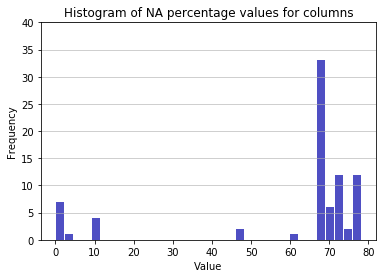

In [6]:
n, bins, patches = plt.hist(x=df['Na Percent'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NA percentage values for columns')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [7]:
data.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3865.0000000,3864.0000000,3864.0000000,3837.0000000,3837.0000000,3732.0000000,3502.0000000,3474.0000000,3474.0000000,3432.0000000,...,916.0000000,915.0000000,914.0000000,893.0000000,892.0000000,912.0000000,941.0000000,874.0000000,844.0000000,3865.0000000
mean,1000709.0600259,0.8724787,76.7981107,31633.2408721,0.8251535,14.7232965,10.2839589,0.8042465,0.7458999,135.1291782,...,0.8235611,0.8442087,1.0084651,121.7547972,120.8734279,21.2529221,6.4430232,22.2614745,0.6007333,0.0827731
std,6945.4631430,0.1623667,10.4616545,18736.3784455,0.1940549,3.6125460,3.3199476,0.1762425,0.1997951,52.4495346,...,0.1857800,0.1590409,0.0872988,46.2693621,46.7956657,14.2589862,4.8048734,34.3427973,0.2057847,0.0634153
min,990025.0000000,0.2278895,34.2440617,-126.9065215,0.2920006,3.7996634,1.9281663,0.2736836,0.1898736,9.9259057,...,0.3057332,0.3695187,0.4651771,23.2246029,16.2151509,-76.7414140,-1.1920112,-735.1868865,0.0890923,0.0130365
25%,995006.0000000,0.7630267,69.9614492,20169.1189116,0.6771306,12.5924674,7.6541687,0.6718620,0.5977458,92.2627238,...,0.6907065,0.7312635,0.9658002,84.0908163,82.2325500,15.0010280,4.1134725,17.2278994,0.4303324,0.0478893
50%,1000000.0000000,0.9073593,78.9951007,26600.7681946,0.8272997,14.9429130,10.3854654,0.8247580,0.7612554,135.9143181,...,0.8354097,0.8627727,1.0299468,120.0699157,121.0579227,22.1825706,5.3094969,24.4725566,0.6246400,0.0578200
75%,1006009.0000000,0.9927599,84.5589715,36898.6317538,0.9702946,17.1237969,12.8847521,0.9390430,0.8935053,175.3019927,...,0.9703653,0.9613689,1.0684812,158.5796438,157.8156254,29.1347378,6.8145775,31.7482948,0.7674039,0.0873893
max,1015056.0000000,1.2469084,100.2100529,151072.6831557,1.3618833,26.9559439,19.0576480,1.2328138,1.2696252,278.7866130,...,1.2376613,1.1827463,1.1812300,232.7208468,233.9153734,61.9036413,36.5384618,95.9412450,1.0984392,0.6838127


In [8]:
neg_df = pd.DataFrame()

for col in data.iloc[:, 2:-1].columns:
    neg_df.at[col, 'Neg Percent'] = (sum(n < 0 for n in data[col])/len(data))*100
# neg_df.reset_index(inplace=True)
neg_df['Neg Percent'].sort_values()

existence expectancy index                                                                0.0000000
Share of employment in nonagriculture, female (% of total employment in nonagriculture)   0.0000000
Youth unemployment rate (female to male ratio)                                            0.0000000
Unemployment, youth (% ages 15–24)                                                        0.0000000
Mortality rate, female grown up (per 1,000 people)                                        0.0000000
                                                                                             ...   
Outer Galaxies direct investment, net inflows (% of GGP)                                  0.0517464
Population, under age 5 (millions)                                                        0.0776197
Domestic credit provided by financial sector (% of GGP)                                   0.1034929
Private galaxy capital flows (% of GGP)                                                   0.9055627


Since there are some negative values in some of the features such as 'Gross income per capita' or 'Private galaxy capital flows (% of GGP)' and their percentages are low, so we will be replacing these values with absolutes.

In [9]:
# Absolute except indexes and y column
data.iloc[:, 2:-1] = abs(data.iloc[:, 2:-1])

In [10]:
row_with_na = data.isna().sum(axis=1).reset_index()
row_with_na[0].sort_values()

3363     0
2847     0
3588     0
3589     0
2838     0
        ..
1589    75
2131    75
1356    75
3090    75
1638    75
Name: 0, Length: 3865, dtype: int64

(array([ 822.,  142.,   58.,  117.,   60.,   44.,   20.,  147., 1280.,
        1175.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

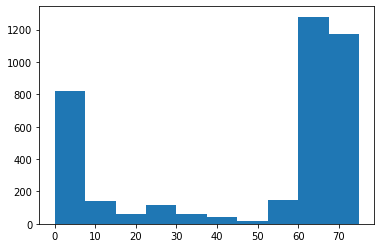

In [11]:
plt.hist(x=row_with_na[0])

Drop top NA rows

In [12]:
df1 = data.drop(row_with_na.loc[row_with_na[0] > 70, 'index'].tolist())
df1

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.6286569,63.1252002,27109.2343096,0.6460395,8.2405427,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0525898
1,990025,Camelopardalis B,0.8180822,81.0049945,30166.7939575,0.8522464,10.6718232,4.7424696,0.8336237,0.4678729,...,nan,nan,nan,nan,nan,19.1779260,nan,22.7850176,nan,0.0598680
2,990025,Virgo I,0.6594432,59.5705336,8441.7073527,0.4997615,8.8403159,5.5839725,0.4691095,0.3638372,...,nan,nan,nan,nan,nan,21.1512655,6.5340200,nan,nan,0.0504491
3,990025,UGC 8651 (DDO 181),0.5558616,52.3332928,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,5.9121942,nan,nan,0.0493942
4,990025,Tucana Dwarf,0.9911964,81.8024641,81033.9569059,1.1311627,13.8006718,13.1889066,0.9103409,0.9183532,...,nan,nan,nan,nan,nan,nan,5.6117529,nan,nan,0.1542470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,Columba I,1.0297042,82.8320631,34310.4714078,0.8550941,18.5785855,10.5571434,0.9065728,0.8628261,...,0.9434104,0.9022366,1.0605324,124.5641208,143.9075761,26.4387189,3.0237086,29.2948647,0.5807855,0.0423242
3861,1015056,"Leo II Dwarf (Leo B, DDO 93)",0.9378688,75.8770982,36899.0677193,0.9294944,16.1538567,9.1516648,0.8658222,0.7475768,...,0.9152247,0.7980833,1.0551180,163.6645160,184.2911554,20.6376542,4.4705962,31.0854004,0.5175577,0.0367246
3862,1015056,Canes Venatici I Dwarf,1.0361439,93.5402752,37002.9778754,1.0852452,21.0664726,16.6613437,0.9838347,1.1007785,...,1.0972081,1.0448901,1.1147542,66.4987141,112.8870354,28.1548594,5.1939970,32.1455699,0.3638618,0.1662709
3863,1015056,KKs 3,0.9390342,78.2744267,28180.4597702,0.6876552,9.3889109,8.9087483,0.7356940,0.6027028,...,0.5961641,0.7547291,0.8258643,182.2490788,175.4089534,38.9631569,2.8541403,27.2271786,0.7118775,0.0241870


In [13]:
galaxy_imputer = {}
for col in data.iloc[:, 2:-1].columns:
    galaxy_imputer[col] = data.groupby('galaxy')[col].agg(['mean', 'median'])

In [14]:
def row_handle(row, imputer_dict, key_index, method='median'):
    for col in row.index:
        if pd.isnull(row[col]):
            row[col] = imputer_dict[col].loc[row[key_index], method]
    return row

In [15]:
imp_data_median = data.apply(lambda x: row_handle(x, galaxy_imputer, 'galaxy', 'median'), axis=1) 
# imp_data_mean = data.apply(lambda x: row_handle(x, galaxy_imputer, 'galaxy', 'mean'), axis=1) 

In [16]:
# Find columns that can't be filled/imputed
not_imp_columns = imp_data_median.iloc[:, 2:-1].isna().sum()[imp_data_median.isna().sum() == 0].index
# not_imp_columns = imp_data_mean.iloc[:, 2:-1].isna().sum()[imp_data_mean.isna().sum() == 0].index
not_imp_columns

Index(['Gross income per capita', 'Income Index',
       'Population, total (millions)', 'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
       'Renewable energy consumption (% of total final energy consumption)'],
      dtype='object')

In [17]:
cluster_median = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3, n_jobs=-1))])
# cluster_mean = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4, n_jobs=-1))])
cluster_median.fit(imp_data_median[not_imp_columns])
# cluster_mean.fit(imp_data_mean[not_imp_columns])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=-1,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [18]:
imp_data_median = imp_data_median.assign(clusters=cluster_median.predict(imp_data_median[not_imp_columns]))
# imp_data_mean = imp_data_mean.assign(clusters=cluster_mean.predict(imp_data_mean[not_imp_columns]))

In [19]:
cluster_imputer = {}
# cluster_imp_mean = {}
for col in imp_data_median.iloc[:, 2:-1].columns:
    cluster_imputer[col] = imp_data_median.groupby('clusters')[col].agg(['median'])
#     cluster_imp_mean[col] = imp_data_mean.groupby('clusters')[col].agg(['mean'])

In [21]:
# imp_data_median = imp_data_median.apply(lambda x: row_handle(x, galaxy_imputer, 'galaxy', 'median'), axis=1) 
df_clean = imp_data_median.apply(lambda x: row_handle(x, cluster_imputer, 'clusters', 'median'), axis=1) 

In [22]:
df_clean = df_clean.drop('clusters', axis=1)
df_clean

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.6286569,63.1252002,27109.2343096,0.6460395,8.2405427,5.9729127,0.7618440,0.5438643,...,0.7529299,0.7351813,0.9761198,153.9816472,150.1090375,34.5123408,6.5441675,23.4443697,0.7234321,0.0525898
1,990025,Camelopardalis B,0.8180822,81.0049945,30166.7939575,0.8522464,10.6718232,4.7424696,0.8336237,0.4678729,...,0.8176119,0.8870165,0.9431422,124.4179314,96.5136906,19.1779260,4.8969422,22.7850176,0.7145450,0.0598680
2,990025,Virgo I,0.6594432,59.5705336,8441.7073527,0.4997615,8.8403159,5.5839725,0.4691095,0.3638372,...,0.4367070,0.5379038,0.8464133,212.6305013,195.0403171,21.1512655,6.5340200,23.4443697,0.8765633,0.0504491
3,990025,UGC 8651 (DDO 181),0.5558616,52.3332928,21389.2246150,0.6026285,8.2352664,9.1335223,0.5905926,0.5018065,...,0.5403855,0.6221114,0.9714740,190.1753311,205.9748882,17.0360823,5.9121942,23.4443697,0.8038415,0.0493942
4,990025,Tucana Dwarf,0.9911964,81.8024641,81033.9569059,1.1311627,13.8006718,13.1889066,0.9103409,0.9183532,...,1.0340016,1.0491670,1.0748351,61.0097220,56.1123456,32.8529109,5.6117529,137.2869039,0.3116588,0.1542470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,Columba I,1.0297042,82.8320631,34310.4714078,0.8550941,18.5785855,10.5571434,0.9065728,0.8628261,...,0.9434104,0.9022366,1.0605324,124.5641208,143.9075761,26.4387189,3.0237086,29.2948647,0.5807855,0.0423242
3861,1015056,"Leo II Dwarf (Leo B, DDO 93)",0.9378688,75.8770982,36899.0677193,0.9294944,16.1538567,9.1516648,0.8658222,0.7475768,...,0.9152247,0.7980833,1.0551180,163.6645160,184.2911554,20.6376542,4.4705962,31.0854004,0.5175577,0.0367246
3862,1015056,Canes Venatici I Dwarf,1.0361439,93.5402752,37002.9778754,1.0852452,21.0664726,16.6613437,0.9838347,1.1007785,...,1.0972081,1.0448901,1.1147542,66.4987141,112.8870354,28.1548594,5.1939970,32.1455699,0.3638618,0.1662709
3863,1015056,KKs 3,0.9390342,78.2744267,28180.4597702,0.6876552,9.3889109,8.9087483,0.7356940,0.6027028,...,0.5961641,0.7547291,0.8258643,182.2490788,175.4089534,38.9631569,2.8541403,27.2271786,0.7118775,0.0241870


Examine Prediction Class

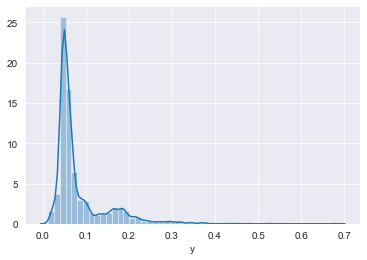

In [23]:
from scipy import stats
sns.set_style('darkgrid')
sns.distplot(df_clean['y'])
# sns.distplot(data['y'], fit=stats.laplace, kde=False)

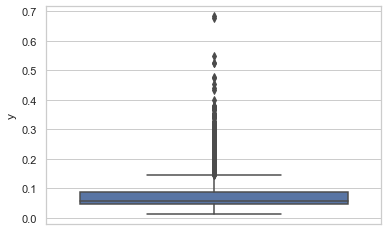

In [24]:
# Dist of Prediction
sns.set(style="whitegrid")
ax = sns.boxplot(y=df_clean["y"])

In [25]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[2:len(df1.columns)-1]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df1 = normalize(df_clean)

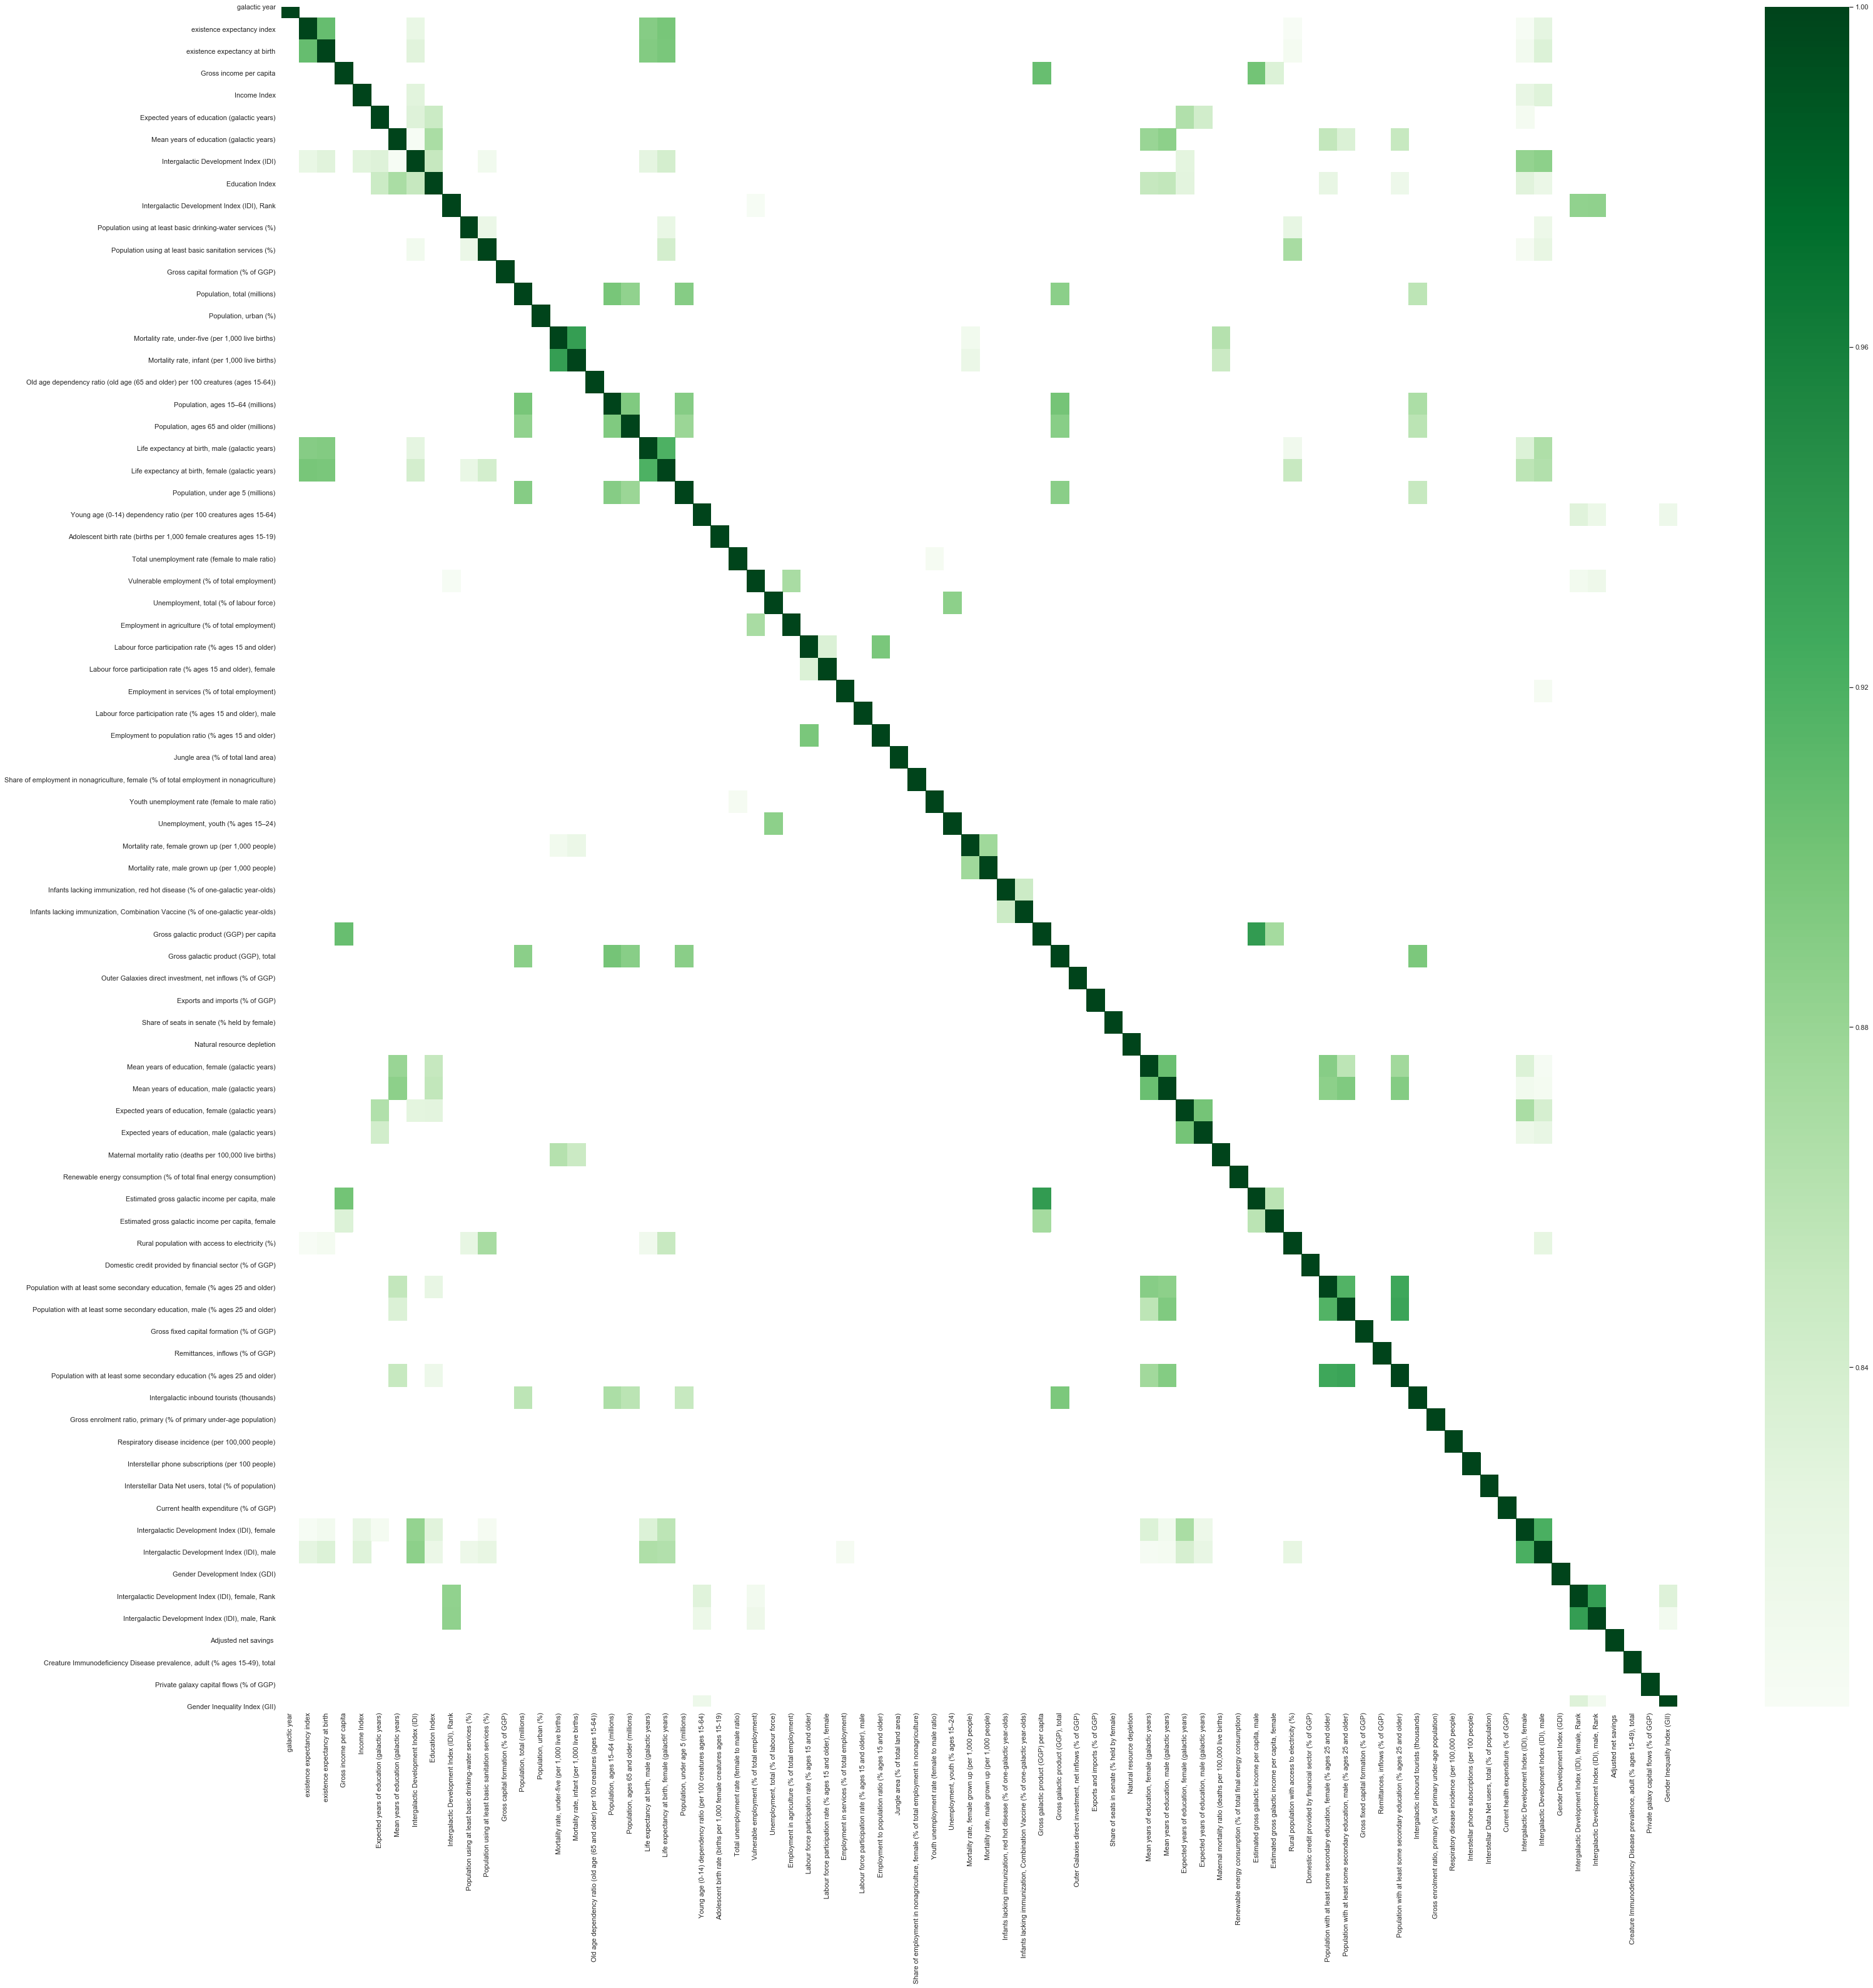

In [26]:
corr = df_clean.iloc[:,:-1].corr()

kot = corr[corr>=.8]
plt.figure(figsize=(50,50))
sns.heatmap(kot, cmap="Greens", xticklabels =True, yticklabels=True)

Let's check one pair with higher correlation - such as existence expectancy index & existence expectancy at birth (Col 2 and 3)

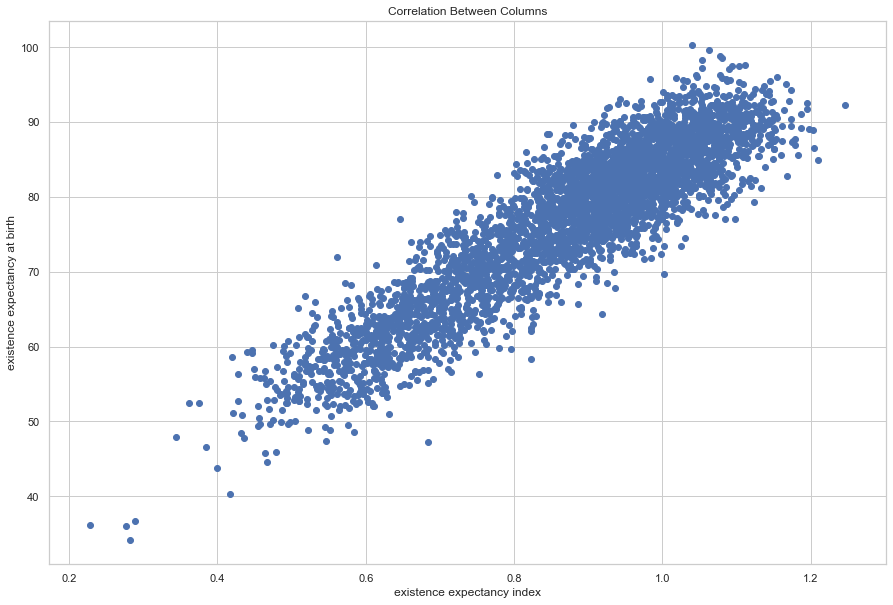

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_clean['existence expectancy index'], y=df_clean['existence expectancy at birth'])
plt.xlabel('existence expectancy index')
plt.ylabel('existence expectancy at birth')
plt.title('Correlation Between Columns')
plt.show()

It seems quite correlated. We can eliminate one of these correlated features in furthter analysis.

In [29]:
seed = 189
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()
# df = df.drop('y', axis=1)

df_list = list(df.columns)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (2898, 77)
Train_y Shape:  (2898,)
Test_x Shape:  (967, 77)
Test_y Shape:  (967,)


In [30]:
def get_models():
    
    dt = DecisionTreeRegressor()
    sgb = GradientBoostingRegressor()
    xgbo = xgb.XGBRegressor()
    rf = RandomForestRegressor()
    svm = SVR(kernel='linear')
    mlp = MLPRegressor()
    knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
    
    models = {'decision tree': dt,
              'gradient boosting': sgb,
              'xgboost': xgbo,
              'random forest': rf,
              'support vector': svm,
               'multi-layer p': mlp,
               'knn': knn
             }

    return models


def prediction(model_list):

    pred = np.zeros((test_y.shape[0], len(model_list)))
    pred = pd.DataFrame(pred)
    pred = pred.apply(pd.to_numeric)

    print("Calculating predictions..")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("Model: %s" % name)
        m.fit(train_x, train_y)
        pred.iloc[:, i] = m.predict(test_x)
        cols.append(name)
        
    pred.columns = cols
    return pred


def rmse_func(y, pred):
    rmse_scores = pd.DataFrame()
    print("Calculating rmse scores..")
    for i in pred.columns:
        scores = mean_squared_error(y, pred.loc[:, i])**(1/2)
        rmse_scores.at[i, 'Score'] = scores
        print("%-26s: %f" % (i, scores))
    rmse_scores.reset_index(inplace=True)
    return rmse_scores

Scenario 1 - All Features

In [31]:
# Scenario 1
models = get_models()
pred = prediction(models)
s1_rmse_scores = rmse_func(test_y, pred)
s1_rmse_scores.rename(columns={'Score': 'Scenario1'}, inplace=True)

Calculating predictions..
Model: decision tree
Model: gradient boosting
Model: xgboost
Model: random forest
Model: support vector
Model: multi-layer p
Model: knn
Calculating rmse scores..
decision tree             : 0.022213
gradient boosting         : 0.018046
xgboost                   : 0.017108
random forest             : 0.015921
support vector            : 0.044434
multi-layer p             : 0.035308
knn                       : 0.015197


Scenario 2 - Top N Features

In [32]:
x = df1.iloc[:, 2:-1]  #independent columns
y = df1.iloc[:, -1]  # dependent columns

topfeatures = SelectKBest(score_func=f_regression, k=10)
fit = topfeatures.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

feature_rank = pd.concat([df_columns, df_scores], axis=1)
feature_rank.columns = ['Specs','Score'] 
print(feature_rank.nlargest(20,'Score'))

                                                Specs        Score
76                      Gender Inequality Index (GII) 5153.8361055
66  Interstellar Data Net users, total (% of popul... 5048.2276518
16  Old age dependency ratio (old age (65 and olde... 4411.7230516
71  Intergalactic Development Index (IDI), female,... 3801.5242883
72  Intergalactic Development Index (IDI), male, Rank 3791.7039013
54  Estimated gross galactic income per capita, fe... 3307.4206856
8         Intergalactic Development Index (IDI), Rank 3291.7169735
68      Intergalactic Development Index (IDI), female 2791.4851462
69        Intergalactic Development Index (IDI), male 2693.8318671
50  Expected years of education, male (galactic ye... 2529.3943829
6               Intergalactic Development Index (IDI) 2421.1536603
7                                     Education Index 2251.5958553
48     Mean years of education, male (galactic years) 2246.0768215
49  Expected years of education, female (galactic ... 2167.954

In [33]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()
df = df[feature_rank.nlargest(10, 'Score').Specs.tolist()]

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (2898, 10)
Train_y Shape:  (2898,)
Test_x Shape:  (967, 10)
Test_y Shape:  (967,)


In [34]:
models = get_models()
pred = prediction(models)
s2_rmse_scores = rmse_func(test_y, pred)
s2_rmse_scores.rename(columns={'Score': 'Scenario2'}, inplace=True)

Calculating predictions..
Model: decision tree
Model: gradient boosting
Model: xgboost
Model: random forest
Model: support vector
Model: multi-layer p
Model: knn
Calculating rmse scores..
decision tree             : 0.030546
gradient boosting         : 0.022904
xgboost                   : 0.020950
random forest             : 0.020909
support vector            : 0.049917
multi-layer p             : 0.029224
knn                       : 0.022584


In [35]:
rmse_scores = pd.merge(s1_rmse_scores, s2_rmse_scores, on='index')
rmse_scores['Improvement'] = ((rmse_scores['Scenario2'] - rmse_scores['Scenario1'])/rmse_scores['Scenario1']) * 100
rmse_scores

,index,Scenario1,Scenario2,Improvement
0,decision tree,0.0222129,0.0305460,37.5143546
1,gradient boosting,0.0180465,0.0229044,26.9188190
2,xgboost,0.0171084,0.0209495,22.4513998
3,random forest,0.0159209,0.0209095,31.3332473
4,support vector,0.0444335,0.0499167,12.3401916
5,multi-layer p,0.0353076,0.0292240,-17.2301035
6,knn,0.0151967,0.0225839,48.6104299


Since lower rmse is better, only mlp performed better with 10 best features according to scenario 1.

Scenario 3 - Best N Feature for all models

Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: decision tree
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: gradient boosting
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: xgboost
Model: random forest
Model: random forest
Model: random forest
Model: random forest
M

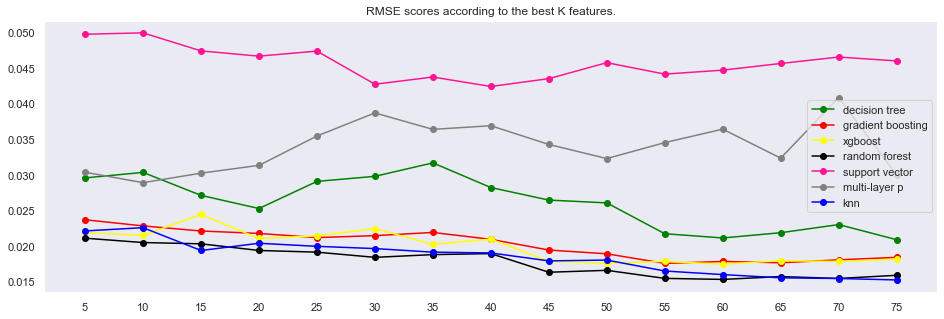

In [179]:
x = df1.iloc[:, 2:-1]  #independent columns
y = df1.iloc[:, -1]  # dependent columns

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=seed)
# Define number of features to search
num_features = [i for i in range(5, len(df1.iloc[:, 2:-1].columns), 5)]

# Different Colors for each model 
color_list = ['green', 'red', 'yellow', 'black', 'deeppink', 'gray', 'blue', 'orange']

# Get Models
models = get_models()

# Scenario 3 Rmse
s3_rmse_scores = pd.DataFrame()

plt.figure(figsize=(16,5))
for i, (name, m) in enumerate(models.items()):
    scores = []
    for k in num_features:
        topfeatures = SelectKBest(score_func=f_regression, k=k)
        topfeatures.fit(x, y)

        cols = topfeatures.get_support(indices=True)

        X_train = np.take(train_x, cols, axis=1)
        X_test = np.take(test_x, cols, axis=1)


        print("Model: %s" % name)
        m.fit(X_train, train_y)
        preds = m.predict(X_test)

        score = mean_squared_error(test_y, preds) ** (1/2)
        scores.append(score)
       
        s3_rmse_scores.at[name, 'Score'] = min(scores)
    plt.plot(num_features, scores, '-ok', label=name, color=color_list[i]);

plt.legend(numpoints=1)
plt.title("RMSE scores according to the best K features.")
plt.xticks(num_features)
plt.grid()

In [37]:
s3_rmse_scores = s3_rmse_scores.reset_index()
s3_rmse_scores.rename(columns={'Score': 'Scenario3'}, inplace=True)

rmse_scores = pd.merge(rmse_scores, s3_rmse_scores, on='index')
rmse_scores['Improvement - 2vs3'] = ((rmse_scores['Scenario3'] - rmse_scores['Scenario2'])/rmse_scores['Scenario2']) * 100
rmse_scores['Improvement - 1vs3'] = ((rmse_scores['Scenario3'] - rmse_scores['Scenario1'])/rmse_scores['Scenario1']) * 100
rmse_scores

,index,Scenario1,Scenario2,Improvement,Scenario3,Improvement - 2vs3,Improvement - 1vs3
0,decision tree,0.0222129,0.0305460,37.5143546,0.0210331,-31.1428711,-5.3115635
1,gradient boosting,0.0180465,0.0229044,26.9188190,0.0174802,-23.6819446,-3.1380254
2,xgboost,0.0171084,0.0209495,22.4513998,0.0174632,-16.6415316,2.0736114
3,random forest,0.0159209,0.0209095,31.3332473,0.0152506,-27.0636555,-4.2103303
4,support vector,0.0444335,0.0499167,12.3401916,0.0423919,-15.0748116,-4.5948806
5,multi-layer p,0.0353076,0.0292240,-17.2301035,0.0291663,-0.1976889,-17.3937303
6,knn,0.0151967,0.0225839,48.6104299,0.0152479,-32.4833623,0.3367655


Scenario 4 - Select From Modal

In [38]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()
# df = df.drop('y', axis=1)

df_list = list(df.columns)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

models = get_models()
sfm_feature_dict = {}
for i, (name, m) in enumerate(models.items()):
    if name not in ['multi-layer p', 'knn']: #MLPRegressor and KNN does not support this.
        smod = SelectFromModel(m)
        smod.fit(train_x, train_y)
        feature_list = [] 
        for j in range(len(df.columns.tolist())):
            if j in smod.get_support(indices=True):
                feature_list.append(df.columns.tolist()[j])
        sfm_feature_dict[name] = feature_list

In [39]:
s4_rmse_scores = pd.DataFrame()

for i, (name, m) in enumerate(models.items()):
    if name not in ['multi-layer p', 'knn']:
        df_test = df[sfm_feature_dict[name]]
        train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)
        print("Model: %s" % name)
        m.fit(train_x, train_y)
        preds = m.predict(test_x)

        score = mean_squared_error(test_y, preds) ** (1/2)
        s4_rmse_scores.at[name, 'Score'] = score

Model: decision tree
Model: gradient boosting
Model: xgboost
Model: random forest
Model: support vector


In [40]:
s4_rmse_scores = s4_rmse_scores.reset_index()
s4_rmse_scores.rename(columns={'Score': 'Scenario4'}, inplace=True)

rmse_scores = pd.merge(rmse_scores, s4_rmse_scores, on='index', how='left')
rmse_scores['Improvement - 3vs4'] = ((rmse_scores['Scenario4'] - rmse_scores['Scenario3'])/rmse_scores['Scenario3']) * 100
rmse_scores['Improvement - 2vs4'] = ((rmse_scores['Scenario4'] - rmse_scores['Scenario2'])/rmse_scores['Scenario2']) * 100
rmse_scores['Improvement - 1vs4'] = ((rmse_scores['Scenario4'] - rmse_scores['Scenario1'])/rmse_scores['Scenario1']) * 100
rmse_scores

,index,Scenario1,Scenario2,Improvement,Scenario3,Improvement - 2vs3,Improvement - 1vs3,Scenario4,Improvement - 3vs4,Improvement - 2vs4,Improvement - 1vs4
0,decision tree,0.0222129,0.0305460,37.5143546,0.0210331,-31.1428711,-5.3115635,0.0211207,0.4164191,-30.8561368,-4.9172628
1,gradient boosting,0.0180465,0.0229044,26.9188190,0.0174802,-23.6819446,-3.1380254,0.0180610,3.3227406,-21.1460936,0.0804468
2,xgboost,0.0171084,0.0209495,22.4513998,0.0174632,-16.6415316,2.0736114,0.0171084,-2.0314863,-18.3349475,0.0000000
3,random forest,0.0159209,0.0209095,31.3332473,0.0152506,-27.0636555,-4.2103303,0.0156947,2.9117150,-24.9399570,-1.4212081
4,support vector,0.0444335,0.0499167,12.3401916,0.0423919,-15.0748116,-4.5948806,0.0444335,4.8161783,-10.9846631,0.0000000
5,multi-layer p,0.0353076,0.0292240,-17.2301035,0.0291663,-0.1976889,-17.3937303,nan,nan,nan,nan
6,knn,0.0151967,0.0225839,48.6104299,0.0152479,-32.4833623,0.3367655,nan,nan,nan,nan


Scenario 5 - RFE

As we previously analyzed the correlated features, we will eliminate those correlated features in this step.

In [41]:
correlated_features = []
correl = df1.drop('y', axis=1).corr()

for i in range(len(correl.columns)):
    for j in range(i):
        if abs(correl.iloc[i, j]) > 0.75:
            colname = correl.columns[i]
            correlated_features.append(colname)

# Remove duplicates
correlated_features = list(dict.fromkeys(correlated_features))
correlated_features

['existence expectancy at birth',
 'Intergalactic Development Index (IDI)',
 'Education Index',
 'Intergalactic Development Index (IDI), Rank',
 'Population using at least basic drinking-water services (%)',
 'Population using at least basic sanitation services (%)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Mortality rate, infant (per 1,000 live births)',
 'Population, ages 15–64 (millions)',
 'Population, ages 65 and older (millions)',
 'Life expectancy at birth, male (galactic years)',
 'Life expectancy at birth, female (galactic years)',
 'Population, under age 5 (millions)',
 'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
 'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
 'Vulnerable employment (% of total employment)',
 'Employment in agriculture (% of total employment)',
 'Labour force participation rate (% ages 15 and older), female',
 'Employment in services (% of total employment)',
 'Employment to population ratio (%

In [42]:
target = df1['y']
df = df1.iloc[:, 2:-1].copy()

df = df.drop(correlated_features, axis=1)
df.shape

(3865, 31)

In [43]:
# RFE will give default 15 best features, half of total features
models = get_models()
feature_dict = {}
for i, (name, m) in enumerate(models.items()):
    if name not in ['multi-layer p', 'knn']:
        rfe = RFE(estimator=m)
        rfe.fit(df, target)
        feature_dict[name] = df.columns[np.where(rfe.support_ == True)[0]]
        print('Optimal number of features for {} : {}'.format(name, rfe.n_features_))
#         del rfe

Optimal number of features for decision tree : 15
Optimal number of features for gradient boosting : 15
Optimal number of features for xgboost : 15
Optimal number of features for random forest : 15
Optimal number of features for support vector : 15


In [44]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()

s5_rmse_scores = pd.DataFrame()

for i, (name, m) in enumerate(models.items()):
    if name not in ['multi-layer p', 'knn']:
        df_test = df[feature_dict[name]]
        train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)
        print("Model: %s" % name)
        m.fit(train_x, train_y)
        preds = m.predict(test_x)

        score = mean_squared_error(test_y, preds) ** (1/2)
        s5_rmse_scores.at[name, 'Score'] = score

Model: decision tree
Model: gradient boosting
Model: xgboost
Model: random forest
Model: support vector


In [45]:
s5_rmse_scores = s5_rmse_scores.reset_index()
s5_rmse_scores.rename(columns={'Score': 'Scenario5'}, inplace=True)

rmse_scores = pd.merge(rmse_scores, s5_rmse_scores, on='index', how='left')
rmse_scores['Improvement - 4vs5'] = ((rmse_scores['Scenario5'] - rmse_scores['Scenario4'])/rmse_scores['Scenario4']) * 100
rmse_scores['Improvement - 3vs5'] = ((rmse_scores['Scenario5'] - rmse_scores['Scenario3'])/rmse_scores['Scenario3']) * 100
rmse_scores['Improvement - 2vs5'] = ((rmse_scores['Scenario5'] - rmse_scores['Scenario2'])/rmse_scores['Scenario2']) * 100
rmse_scores['Improvement - 1vs5'] = ((rmse_scores['Scenario5'] - rmse_scores['Scenario1'])/rmse_scores['Scenario1']) * 100
rmse_scores

,index,Scenario1,Scenario2,Improvement,Scenario3,Improvement - 2vs3,Improvement - 1vs3,Scenario4,Improvement - 3vs4,Improvement - 2vs4,Improvement - 1vs4,Scenario5,Improvement - 4vs5,Improvement - 3vs5,Improvement - 2vs5,Improvement - 1vs5
0,decision tree,0.0222129,0.0305460,37.5143546,0.0210331,-31.1428711,-5.3115635,0.0211207,0.4164191,-30.8561368,-4.9172628,0.0234867,11.2024607,11.6655290,-23.1103228,5.7343434
1,gradient boosting,0.0180465,0.0229044,26.9188190,0.0174802,-23.6819446,-3.1380254,0.0180610,3.3227406,-21.1460936,0.0804468,0.0182772,1.1973464,4.5598718,-20.2019391,1.2787565
2,xgboost,0.0171084,0.0209495,22.4513998,0.0174632,-16.6415316,2.0736114,0.0171084,-2.0314863,-18.3349475,0.0000000,0.0171084,0.0000000,-2.0314863,-18.3349475,0.0000000
3,random forest,0.0159209,0.0209095,31.3332473,0.0152506,-27.0636555,-4.2103303,0.0156947,2.9117150,-24.9399570,-1.4212081,0.0157424,0.3044156,3.2249943,-24.7114625,-1.1211189
4,support vector,0.0444335,0.0499167,12.3401916,0.0423919,-15.0748116,-4.5948806,0.0444335,4.8161783,-10.9846631,0.0000000,0.0444335,0.0000000,4.8161783,-10.9846631,0.0000000
5,multi-layer p,0.0353076,0.0292240,-17.2301035,0.0291663,-0.1976889,-17.3937303,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,knn,0.0151967,0.0225839,48.6104299,0.0152479,-32.4833623,0.3367655,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [46]:
all_scenarios = rmse_scores[['index','Scenario1', 'Scenario2', 'Scenario3', 'Scenario4', 'Scenario5']]
all_scenarios

,index,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5
0,decision tree,0.0222129,0.0305460,0.0210331,0.0211207,0.0234867
1,gradient boosting,0.0180465,0.0229044,0.0174802,0.0180610,0.0182772
2,xgboost,0.0171084,0.0209495,0.0174632,0.0171084,0.0171084
3,random forest,0.0159209,0.0209095,0.0152506,0.0156947,0.0157424
4,support vector,0.0444335,0.0499167,0.0423919,0.0444335,0.0444335
5,multi-layer p,0.0353076,0.0292240,0.0291663,nan,nan
6,knn,0.0151967,0.0225839,0.0152479,nan,nan


In [47]:
all_scenarios['mean'] = all_scenarios.mean(axis=1)

In [48]:
all_scenarios

,index,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,mean
0,decision tree,0.0222129,0.0305460,0.0210331,0.0211207,0.0234867,0.0236799
1,gradient boosting,0.0180465,0.0229044,0.0174802,0.0180610,0.0182772,0.0189538
2,xgboost,0.0171084,0.0209495,0.0174632,0.0171084,0.0171084,0.0179476
3,random forest,0.0159209,0.0209095,0.0152506,0.0156947,0.0157424,0.0167036
4,support vector,0.0444335,0.0499167,0.0423919,0.0444335,0.0444335,0.0451218
5,multi-layer p,0.0353076,0.0292240,0.0291663,nan,nan,0.0312326
6,knn,0.0151967,0.0225839,0.0152479,nan,nan,0.0176762


We select xgboost & random forest & knn for next phases with scenario 1 and 5 since those have the minimum rmse scores.

Stratified Cross Validation - cross val returns negative scores for rmse 
- https://github.com/scikit-learn/scikit-learn/issues/2439
- https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated

XGBoost

In [49]:
#RFE features
name = 'xgboost'
feature_dict[name]

Index(['existence expectancy index', 'Gross income per capita', 'Income Index',
       'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Labour force participation rate (% ages 15 and older)',
       'Jungle area (% of total land area)', 'Exports and imports (% of GGP)',
       'Share of seats in senate (% held by female)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Domestic credit provided by financial sector (% of GGP)',
       'Remittances, inflows (% of GGP)',
       'Respiratory disease incidence (per 100,000 people)',
       'Current health expenditure (% of GGP)'],
      dtype='object')

In [50]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()

K_list = [i for i in range(3,11)]
xgbo = xgb.XGBRegressor()

name = 'xgboost'
for k in K_list:
    clf_cv_score = - 1 * cross_val_score(xgbo, df[feature_dict[name]], labels, cv=k, scoring='neg_root_mean_squared_error')
    print("Mean RMSE Score for", name, " with K=", k, ": ", clf_cv_score.mean())

Mean RMSE Score for xgboost  with K= 3 :  0.020497639131093207
Mean RMSE Score for xgboost  with K= 4 :  0.02002282597888088
Mean RMSE Score for xgboost  with K= 5 :  0.019091185726849924
Mean RMSE Score for xgboost  with K= 6 :  0.01857365011534789
Mean RMSE Score for xgboost  with K= 7 :  0.018258207450314895
Mean RMSE Score for xgboost  with K= 8 :  0.01804596494920881
Mean RMSE Score for xgboost  with K= 9 :  0.017022042142484928
Mean RMSE Score for xgboost  with K= 10 :  0.016930306947060207


CV as KFold

In [51]:
xgbo = xgb.XGBRegressor()
name = 'xgboost'
for k in K_list:
    clf_cv_score = - 1 * cross_val_score(xgbo, df[feature_dict[name]], labels, cv=KFold(k), scoring='neg_root_mean_squared_error')
    print("Mean RMSE Score - Xgboost - with K=", k,  clf_cv_score.mean())

Mean RMSE Score - Xgboost - with K= 3 0.020497639131093207
Mean RMSE Score - Xgboost - with K= 4 0.02002282597888088
Mean RMSE Score - Xgboost - with K= 5 0.019091185726849924
Mean RMSE Score - Xgboost - with K= 6 0.01857365011534789
Mean RMSE Score - Xgboost - with K= 7 0.018258207450314895
Mean RMSE Score - Xgboost - with K= 8 0.01804596494920881
Mean RMSE Score - Xgboost - with K= 9 0.017022042142484928
Mean RMSE Score - Xgboost - with K= 10 0.016930306947060207


This shows that train test split is consistent and K = 10 is best in terms of rmse

In [52]:
train_x, test_x, train_y, test_y = train_test_split(df[feature_dict[name]], labels, test_size = 0.25, random_state = seed)

m = models['xgboost']
m.fit(train_x, train_y)
predictions = m.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(m.get_xgb_params())

RMSE Test: 0.017891483984164194
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [53]:
# Define parameters
params = {
        'learning_rate': [0.01, 0.04, 0.1, 0.3, 0.5],
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6],
        'sampling_method': ['uniform', 'gradient_based'] ,
        'n_estimators': [50, 100, 150, 200],
        'min_child_weight': [1, 3, 5, 7]
        }

In [54]:
# labels = np.array(df1['y'])
# df = df1.iloc[:, 2:-1].copy()
# # df = df.drop('y', axis=1)

# df_list = list(df.columns)

# train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state=seed)

xgbo = xgb.XGBRegressor()
model = RandomizedSearchCV(estimator=xgbo, param_distributions = params, scoring='neg_root_mean_squared_error', n_iter = 30,
                              cv = 10 , n_jobs = -1)

model.fit(train_x, train_y)

print("Random Search")
pred = model.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = model.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(model.best_params_)

Random Search
RMSE Train: 0.00691279522454215
RMSE Test: 0.01859808083865363
{'subsample': 1.0, 'sampling_method': 'gradient_based', 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [55]:
print("Grid Search")
grid_search = {
    'subsample': [model.best_params_['subsample'] - 0.01,
                  model.best_params_['subsample'],
                  model.best_params_['subsample'] + 0.01],
    'learning_rate': [model.best_params_['learning_rate'] - 0.01,
                      model.best_params_['learning_rate'],
                      model.best_params_['learning_rate'] + 0.01],
     'min_child_weight': [model.best_params_['min_child_weight'] - 1,
                          model.best_params_['min_child_weight'],
                          model.best_params_['min_child_weight'] + 1],
    'max_depth': [model.best_params_['max_depth'] - 1, 
                  model.best_params_['max_depth'], 
                  model.best_params_['max_depth'] + 1]
}

xgbo = xgb.XGBRegressor()
model = GridSearchCV(estimator=xgbo, param_grid=grid_search, 
                               cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
model.fit(train_x, train_y)


pred = model.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = model.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(model.best_params_)

Grid Search
RMSE Train: 0.008686018949957993
RMSE Test: 0.019037716107091884
{'learning_rate': 0.12000000000000001, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 1.0}


Random Forest

In [56]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()

K_list = [i for i in range(3,11)]

rf = RandomForestRegressor()

name = 'random forest'
for k in K_list:
    clf_cv_score = - 1 * cross_val_score(rf, df, labels, cv=k, scoring='neg_root_mean_squared_error')
    print("Mean RMSE Score for", name, " with K=", k, ": ", clf_cv_score.mean())

Mean RMSE Score for random forest  with K= 3 :  0.018762921202104595
Mean RMSE Score for random forest  with K= 4 :  0.017506884733212266
Mean RMSE Score for random forest  with K= 5 :  0.0161898525498791
Mean RMSE Score for random forest  with K= 6 :  0.015719111402168983
Mean RMSE Score for random forest  with K= 7 :  0.015138239388504575
Mean RMSE Score for random forest  with K= 8 :  0.01502735117686296
Mean RMSE Score for random forest  with K= 9 :  0.014540641027109245
Mean RMSE Score for random forest  with K= 10 :  0.014388002429828392


In [57]:
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

rf = models['random forest']
rf.fit(train_x, train_y)
predictions = rf.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(rf.get_params())

RMSE Test: 0.015380045025412487
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
# Define parameters
params = {
               'max_depth': list(np.linspace(3, 15, 3, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [1, 4, 6, 8, 12],
               'min_samples_split': [2, 5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 150, 5, dtype = int))}

In [59]:

rf = RandomizedSearchCV(estimator=rf, param_distributions = params, scoring='neg_root_mean_squared_error', n_iter = 30,
                              cv = 10 , n_jobs = -1)

rf.fit(train_x, train_y)

print("Random Search")
pred = rf.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = rf.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(rf.best_params_)

Random Search
RMSE Train: 0.010706377705423771
RMSE Test: 0.015927884710120032
{'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15}


In [60]:
grid_search = {
    'max_features': [rf.best_params_['max_features']],
    'min_samples_leaf': [rf.best_params_['min_samples_leaf'] - 1, 
                         rf.best_params_['min_samples_leaf'], 
                         rf.best_params_['min_samples_leaf'] + 1],
    'min_samples_split': [rf.best_params_['min_samples_split'] - 1, 
                          rf.best_params_['min_samples_split'], 
                          rf.best_params_['min_samples_split'] + 1],
    'n_estimators': [rf.best_params_['n_estimators'] - 10, 
                     rf.best_params_['n_estimators'], 
                     rf.best_params_['n_estimators'] + 10]
}

rf = GridSearchCV(estimator=m, param_grid=grid_search, 
                               cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf.fit(train_x, train_y)


print("Grid Search")
pred = rf.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = rf.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(rf.best_params_)

[00:43:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search
RMSE Train: 0.0007543300365920303
RMSE Test: 0.01708411108774419
{'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 140}


KNeighborsRegressor

In [70]:
labels = np.array(df1['y'])
df = df1.iloc[:, 2:-1].copy()

K_list = [i for i in range(3,11)]

knn = KNeighborsRegressor()

name = 'knn'
for k in K_list:
    clf_cv_score = - 1 * cross_val_score(knn, df, labels, cv=k, scoring='neg_root_mean_squared_error')
    print("Mean RMSE Score for", name, " with K=", k, ": ", clf_cv_score.mean())

Mean RMSE Score for knn  with K= 3 :  0.014272985586313408
Mean RMSE Score for knn  with K= 4 :  0.012904237860747115
Mean RMSE Score for knn  with K= 5 :  0.011775281411511317
Mean RMSE Score for knn  with K= 6 :  0.011001105171839684
Mean RMSE Score for knn  with K= 7 :  0.010417998066331443
Mean RMSE Score for knn  with K= 8 :  0.010167583800607382
Mean RMSE Score for knn  with K= 9 :  0.009886889052108602
Mean RMSE Score for knn  with K= 10 :  0.010097152468053457


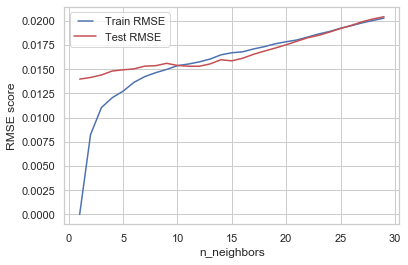

In [61]:
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    
    rmse = mean_squared_error(train_y, train_pred)**(1/2)
    train_results.append(rmse)
    y_pred = model.predict(test_x)
    rmse = mean_squared_error(test_y, y_pred)**(1/2)
    test_results.append(rmse)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label='Train RMSE')
line2, = plt.plot(neighbors, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_neighbors')
plt.show()

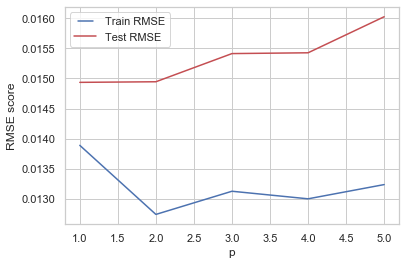

In [62]:
distances = [1, 2, 3, 4, 5]
train_results = []
test_results = []
for p in distances:
    model = KNeighborsRegressor(p=p)
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    
    rmse = mean_squared_error(train_y, train_pred)**(1/2)
    train_results.append(rmse)
    y_pred = model.predict(test_x)
    rmse = mean_squared_error(test_y, y_pred)**(1/2)
    test_results.append(rmse)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, 'b', label='Train RMSE')
line2, = plt.plot(distances, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('p')
plt.show()

In [91]:
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

kn = models['knn']
kn.fit(train_x, train_y)
predictions = kn.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(kn.get_params())

RMSE Test: 0.015196745298626059
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [92]:
# Define parameters
params = {
               'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
               'leaf_size': [15, 20, 25, 30, 35, 40],
               'metric': ['minkowski', 'neg_root_mean_squared_error'],
               'n_neighbors': list(np.linspace(3, 20, 1, dtype = int)),
                'p': [1, 2, 3, 4, 5]}

In [93]:
kn = RandomizedSearchCV(estimator=kn, param_distributions = params, scoring='neg_root_mean_squared_error', n_iter = 30,
                              cv = 9 , n_jobs = -1)

kn.fit(train_x, train_y)

print("KNN")
pred = kn.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = kn.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(kn.best_params_)

KNN
RMSE Train: 2.1330175457337893e-09
RMSE Test: 0.01432026606301029
{'p': 2, 'n_neighbors': 3, 'metric': 'minkowski', 'leaf_size': 15, 'algorithm': 'brute'}


In [95]:
grid_search = {
    'algorithm': [kn.best_params_['algorithm']],
    'leaf_size': [kn.best_params_['leaf_size'] - 2, 
                  kn.best_params_['leaf_size'], 
                  kn.best_params_['leaf_size'] + 2],
    'metric': [kn.best_params_['metric']],
    'n_neighbors': [kn.best_params_['n_neighbors'] - 1, 
                    kn.best_params_['n_neighbors'], 
                    kn.best_params_['n_neighbors'] + 1],
    'p': [kn.best_params_['p'] - 1, 
          kn.best_params_['p'], 
          kn.best_params_['p'] + 1]
}

kn = GridSearchCV(estimator=m, param_grid=grid_search, 
                               cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
kn.fit(train_x, train_y)


print("Grid Search")
pred = kn.best_estimator_.predict(train_x)

print ("RMSE Train:", mean_squared_error(train_y, pred)**(1/2))
predictions = kn.best_estimator_.predict(test_x)

print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

print(kn.best_params_)

[13:46:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { algorithm, leaf_size, metric, n_neighbors, p } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search
RMSE Train: 0.0010539092499607234
RMSE Test: 0.017108426347529675
{'algorithm': 'brute', 'leaf_size': 12, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 0}


Shap

In [124]:
import shap
shap.initjs()

df = df1.iloc[:, 2:-1].copy()
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = seed)

m = models['xgboost']
m.fit(train_x, train_y)
predictions = m.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

# print(m.get_xgb_params())

# train XGBoost model

model = xgb.train(m.get_xgb_params(), xgb.DMatrix(train_x, label=train_y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_x.iloc[0,:])

RMSE Test: 0.017108426347529675


Below graph shows that High Gender Inequality Index lowers the Well-Being Index, which is y value, as expected.

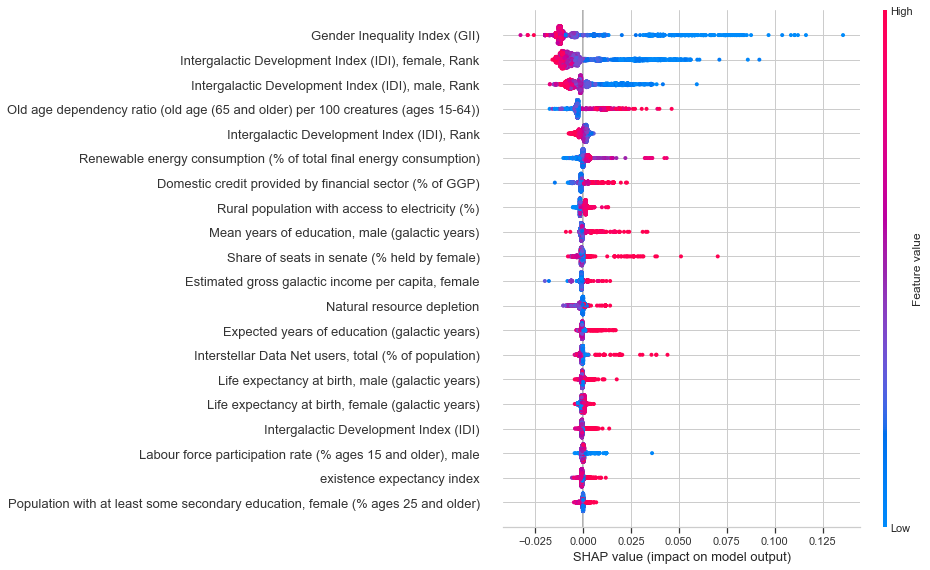

In [80]:
shap.summary_plot(shap_values, train_x)

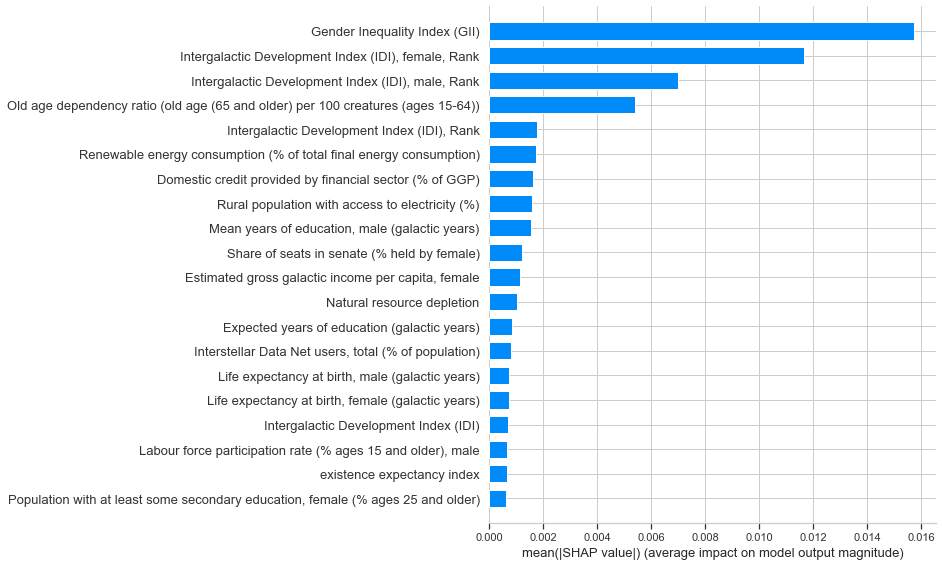

In [81]:
shap.summary_plot(shap_values, train_x, plot_type='bar')

In [100]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(train_x.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
76,Gender Inequality Index (GII),0.0157503
71,"Intergalactic Development Index (IDI), female,...",0.0116729
72,"Intergalactic Development Index (IDI), male, Rank",0.0070064
16,Old age dependency ratio (old age (65 and olde...,0.0053982
8,"Intergalactic Development Index (IDI), Rank",0.0017702


First I will be investigating the feature importance by shap implementation on xgboost

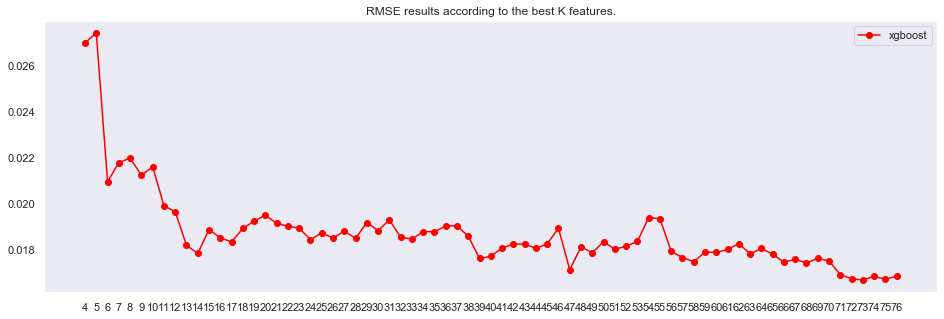

In [154]:
num_features = [i for i in range(4, len(df1.iloc[:, 2:-1].columns), 1)]
# name = 'xgboost'
# m = models[name]

plt.figure(figsize=(16,5))
scores = []
for k in num_features:
    
    train_x, test_x, train_y, test_y = train_test_split(df1[feature_importance['col_name'].head(k).tolist()],
                                                        labels, test_size = 0.25, random_state = seed)
    
    m = models[name]
    m.fit(train_x, train_y)
    preds = m.predict(test_x)

    score = mean_squared_error(test_y, preds) ** (1/2)
    scores.append(score)
plt.plot(num_features, scores, '-ok', label=name, color='red');

plt.legend(numpoints=1)
plt.title("RMSE results according to the best K features.")
plt.xticks(num_features)
plt.grid()

As we discovered before, increasing feature importance decreases the rmse results even though importance calculation is done by shap package.

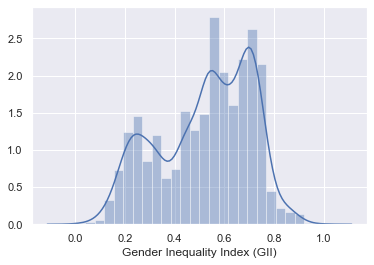

In [121]:
from scipy import stats
sns.set_style('darkgrid')
sns.distplot(df['Gender Inequality Index (GII)'])

I will divide data into two in order to examine the effect of lower & higher GII values on the outcome. Above Distribution of GII shows that we can divide data into two approximately 0.45, which seems to be the breaking point.

In [144]:
df_test_main = df1.iloc[:, 2:].copy()
df_low_gii = df_test_main.loc[df_test_main['Gender Inequality Index (GII)'] < 0.45]
df_high_gii = df_test_main.loc[df_test_main['Gender Inequality Index (GII)'] >= 0.45]

We expect the predicted well being indexes to be high for low gii values, otherwise for high gii values.

In [175]:
labels = np.array(df_test1['y'])
train_x, test_x, train_y, test_y = train_test_split(df_low_gii[feature_importance['col_name'].head(20).tolist()], labels, test_size = 0.25, random_state = seed)

m = models['xgboost']
# m = model
m.fit(train_x, train_y)
predictions = m.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

RMSE Test: 0.027569414644560464


Below graph shows the distribution of predicted y values with the lower GII index.

Text(0.5, 1.0, 'Avg of Well-being Index is 0.14')

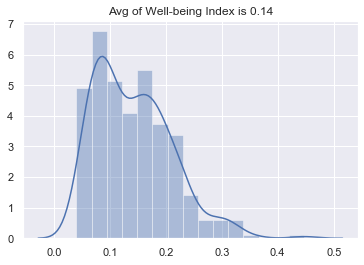

In [176]:
sns.distplot(predictions).set_title('Avg of Well-being Index is %.2f' % round(np.mean(predictions), 2))

In [177]:
labels = np.array(df_high_gii['y'])
train_x, test_x, train_y, test_y = train_test_split(df_high_gii[feature_importance['col_name'].head(20).tolist()], labels, test_size = 0.25, random_state = seed)

m = models['xgboost']
# m = model
m.fit(train_x, train_y)
predictions = m.predict(test_x)
print("RMSE Test:", mean_squared_error(test_y, predictions)**(1/2))

RMSE Test: 0.006549420765575232


Below graph shows the distribution of predicted y values with the higher GII index. As we can see that the predicted well being index values decreased according to previous case.

Text(0.5, 1.0, 'Avg of Well-being Index is 0.05')

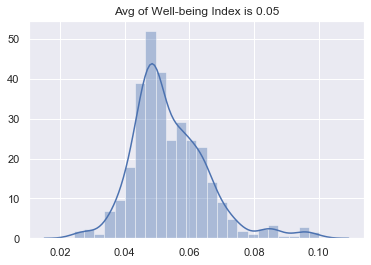

In [178]:
sns.distplot(predictions).set_title('Avg of Well-being Index is %.2f' % round(np.mean(predictions), 2))

You can ignore below

In [ ]:
# testdata = pd.read_csv("./prohack_dataset_avOqBYc/test.csv")
# galaxy_imputer = {}
# for col in testdata.iloc[:, 2:].columns:
#     galaxy_imputer[col] = testdata.groupby('galaxy')[col].agg(['mean', 'median'])
# imp_data_median = testdata.apply(lambda x: row_handle(x, galaxy_imputer, 'galaxy', 'median'), axis=1)
# not_imp_columns = imp_data_median.iloc[:, 2:-1].isna().sum()[imp_data_median.isna().sum() == 0].index
# cluster_median = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3, n_jobs=-1))])
# # cluster_mean = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3, n_jobs=-1))])
# cluster_median.fit(imp_data_median[not_imp_columns])
# imp_data_median = imp_data_median.assign(clusters=cluster_median.predict(imp_data_median[not_imp_columns]))
# cluster_imputer = {}
# # cluster_imp_mean = {}
# for col in imp_data_median.iloc[:, 2:-1].columns:
#     cluster_imputer[col] = imp_data_median.groupby('clusters')[col].agg(['median'])
# testdata = imp_data_median.apply(lambda x: row_handle(x, cluster_imputer, 'clusters', 'median'), axis=1) 
# testdata = testdata.drop('clusters', axis=1)
# testdata.iloc[:, 2:] = normalize(testdata.iloc[:, 2:])

In [ ]:
# finalpredictions = m.predict(testdata[feature_importance['col_name'].head(65).tolist()])

In [ ]:
# finalpredictions


In [ ]:
# submi = pd.read_csv("./prohack_dataset_avOqBYc/sample_submit.csv").drop('Unnamed: 0', axis=1)

In [ ]:
# submi['pred'] = finalpredictions
# finalpredictions = submi['pred'] 

In [ ]:
# index = finalpredictions
# pot_inc = -np.log(index+0.01)+3
# p2 = pot_inc**2

In [ ]:
# ss = pd.DataFrame({
#     'Index':testdata.index,
#     'pred': finalpredictions,
#     'opt_pred':0,
#     'eei':testdata['existence expectancy index'], # So we can split into low and high EEI galaxies
# })

In [ ]:
# ss.loc[p2.nlargest(400).index, 'opt_pred']=100
# ss=ss.sort_values('pred')
# ss.iloc[400:600].opt_pred = 50
# ss=ss.sort_index()

In [ ]:
# ss[['Index', 'pred', 'opt_pred']].to_csv('submission_june.csv', index=False)

In [ ]:
# vals= np.abs(shap_values).mean(0)
# feature_importance = pd.DataFrame(list(zip(train_x.columns,vals)),columns=['col_name','feature_importance_vals'])
# feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
# feature_importance.head()

In [ ]:
# feature_importance['col_name'].head(20).tolist()

In [ ]:
# train_x, test_x, train_y, test_y = train_test_split(df[feature_importance['col_name'].head(65).tolist()], labels, test_size = 0.25, random_state = seed)
# m = models['random forest']
# m.fit(train_x, train_y)
# predictions = m.predict(test_x)
# print("RMSE Test for :", i, mean_squared_error(test_y, predictions)**(1/2))